In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = {
    "Age": [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95],
    "Glucose": [90, 95, 100, 105, 110, 115, 120, 130, 140, 145, 150, 155, 160, 165, 170]
}
df = pd.DataFrame(data)
print(df)

    Age  Glucose
0    25       90
1    30       95
2    35      100
3    40      105
4    45      110
5    50      115
6    55      120
7    60      130
8    65      140
9    70      145
10   75      150
11   80      155
12   85      160
13   90      165
14   95      170


In [3]:
df["High_Glucose"] = (df["Glucose"] >= 126).astype(int)
print(df)

    Age  Glucose  High_Glucose
0    25       90             0
1    30       95             0
2    35      100             0
3    40      105             0
4    45      110             0
5    50      115             0
6    55      120             0
7    60      130             1
8    65      140             1
9    70      145             1
10   75      150             1
11   80      155             1
12   85      160             1
13   90      165             1
14   95      170             1


In [4]:
X = df[['Age']]
Y = df['High_Glucose']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(12, 1) (3, 1)
(12,) (3,)


In [6]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [7]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
print(f"Accuracy Score: {accuracy:.2f}\n")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score: 1.00

Confusion Matrix:
 [[1 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/home/it22a17/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


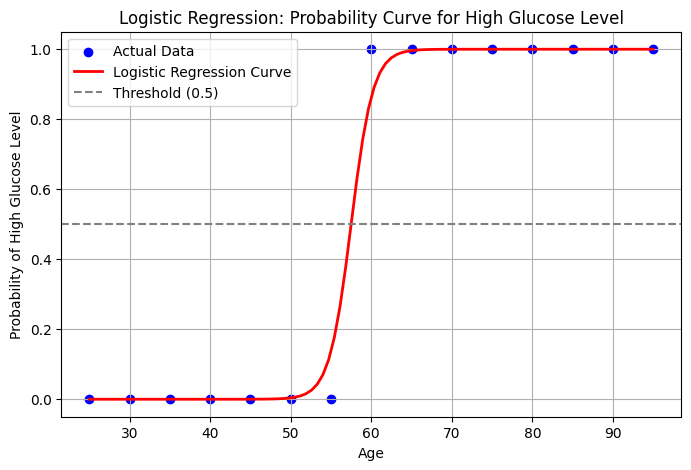

In [8]:
age_range = np.linspace(min(X["Age"]), max(X["Age"]), 100).reshape(-1, 1)
probabilities = model.predict_proba(age_range)[:, 1]  # Get probability of High Glucose (Class 1)
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(age_range, probabilities, color='red', linewidth=2, label='Logistic Regression Curve')
plt.axhline(y=0.5, color='gray', linestyle='dashed', label='Threshold (0.5)')
plt.xlabel("Age")
plt.ylabel("Probability of High Glucose Level")
plt.title("Logistic Regression: Probability Curve for High Glucose Level")
plt.legend()
plt.grid()
plt.show()